## `Missing Data (Complete Case Analysis)` 

- ML algorithms don't work well with *`Missing Data`*. As in *`Sklearn`* all the algorithms are not capable of handling the *`Missing Data`*.
- So as a *Data Scientist* it is our responsibility to remove/impute all the *`missing values`* from the data before training the model with that data.
- As a *Data Scientist* we have two options to handle the *`missing values`* in the data:
    - `Remove the entire row containing` *`missing values`*. But it is not much preferable as it may also remove some data which may be useful.
    - `Another way is to` *`impute/fill`* `them`. It again has two techniques:
        - *`Univariate`* : When filling *`missing values`* the focus is on a *`single`* column. Here we can use `mean/median`, `random`, or `end of distribution` techniques to fill *`numerical missing values`*. And we can use `mode` or we can use the word `missing` to fill *`categorical missing values`*. In *`Sklearn`* there is a class named `SimpleImputer` to do these tasks.
        - *`Multivariate`* : When filling *`missing values`* the focus is on a *`multiple`* column. Here also we have two techniques named `KNN Imputer` (filling the missing values using a ML algorithm) and `Iterative Imputer` (it works on an algorithm named `MICE`).

- Here we will work with `Removing the row`. This approach also known as `CCA (Complete Case Analysis)`.

### `Complete Case Analysis`

- *`Complete Case Analysis (CCA)`* also called *`list-wise detection`* of cases, consists in **discarding** observations (rows) where value in any of the variables (columns) are missing. That means if there is any *`missing value`* in any column of any row of the dataset then that entire row will get removed. 
- *`CCA`* means literally analyzing only those observations (rows) for which there is information in all of the variables (columns) in the dataset. It means only those rows and columns will get analyzed where there is no *`missing values`*.
- This technique is to be used when data is *`Missing Completely At Random [MCAR]`*. That is data is to be sais as *`MCAR`* when the distribution of the data remains same even after removing the rows containing *`missing values`*. 
- Also remember if the percentage of missing data in any column is more than *`5%`* then *`CCA`* is not applied.
- **Advantages:**
    - Easy to implement as no *`data manipulation`* is required.
    - Preserves variable distribution (if data is *`MCAR`*, then the distribution of the variables of the reduced dataset should match the distribution of the original dataset.)
- **Disadvantages:**
    - It can exclude a large fraction of the original dataset (if missing data is abundant).
    - Excluded observations (rows) could be informative for the analysis (if data is not missing at random).
    - When using our models in production, the model will not know how to handle missing data.

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset

df = pd.read_csv('datasets/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
# finding % of missing values in each column

df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
df.shape

(19158, 13)

**Here we will apply `CCA` only on those columns where total number of missing data `<5%`**

In [7]:
# finding the columns where we can apply CCA

cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [8]:
# Checking the dataframe with the columns where we can perform CCA

df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
1334,0.550,no_enrollment,Masters,8.0,80.0
5397,0.896,Part time course,High School,6.0,43.0
6994,0.899,Part time course,Graduate,5.0,5.0
16764,0.910,no_enrollment,Graduate,18.0,28.0
10175,0.926,Full time course,High School,1.0,65.0


In [9]:
# Checking how much data will be there after we remove all the rows with missing values

len(df[cols].dropna())*100 / len(df)

89.68577095730244

**Notes:**

- So we can see that we are left with *`89%`* data even if we remove all the ows with missing data.

In [10]:
# So now creating a new dataframe after dropping the rows with missing data

new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

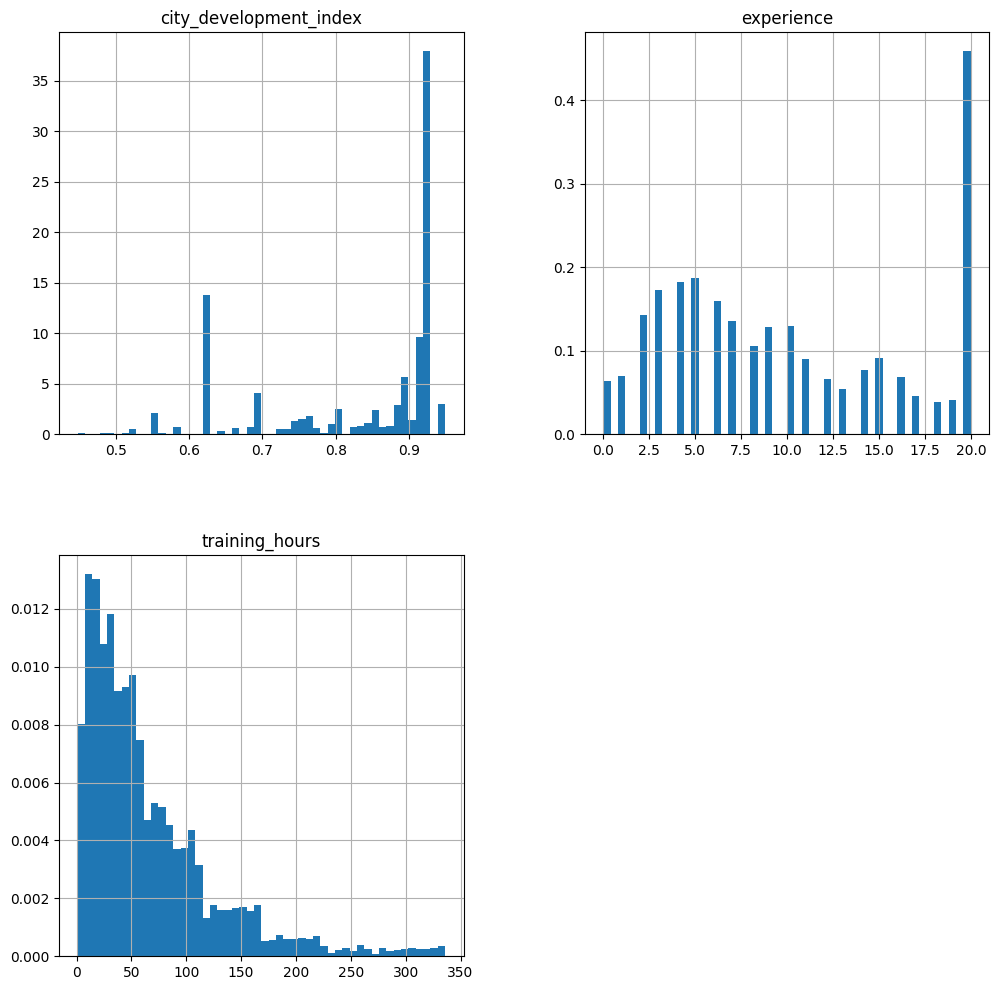

In [11]:
# Checking distribution after performing CCA

new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

**Notes:**

- Now if there is a column with numerical data then always check the distribution of that column before and after *`CCA`*.

<AxesSubplot:>

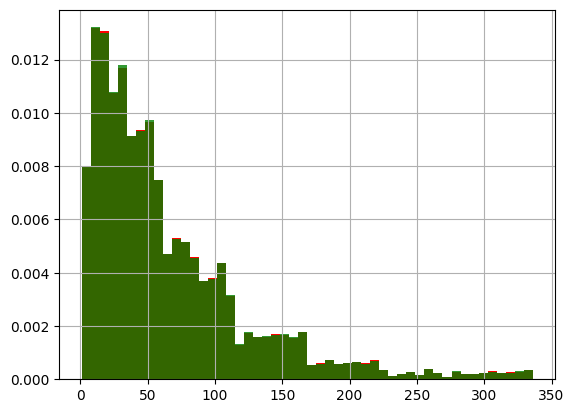

In [12]:
# Here the distribution is overlapped

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

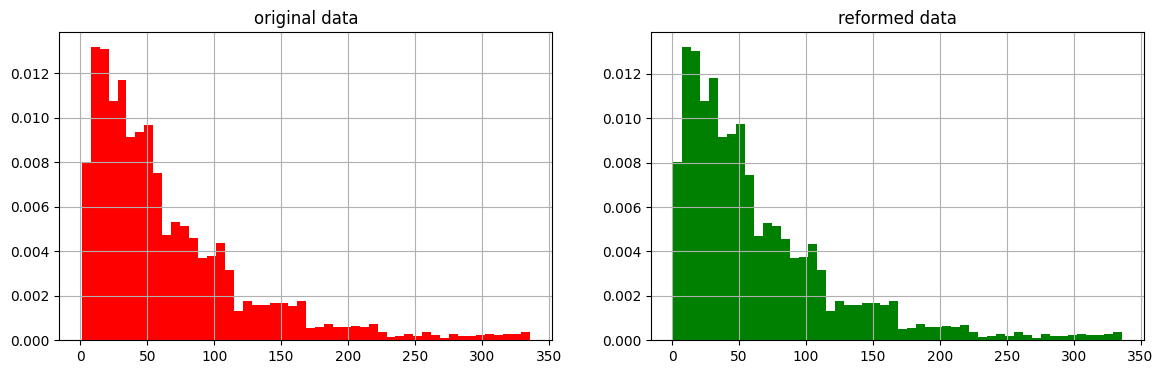

In [14]:
# Now comparing side by side

plt.figure(figsize=(14, 4))
plt.subplot(121)
df['training_hours'].hist(bins=50, density=True, color='red')
plt.title("original data")

plt.subplot(122)
new_df['training_hours'].hist(bins=50, density=True, color='green')
plt.title("reformed data")
plt.show()

**Notes:**

- So we can see not so difference in the distribution, means the data missing was *`MCAR`*.

In [ ]:
# Now do same for the other two numerical columns

**Now for `Categorical` columns**

- Here we need to check that the ratio of each category should remain almost same after performing *`CCA`*.

In [22]:
# Checking the categories along with their percentage of missing values in a category column

df['enrolled_university'].value_counts(normalize=True)

no_enrollment       0.736043
Full time course    0.200139
Part time course    0.063818
Name: enrolled_university, dtype: float64

In [23]:
df['education_level'].value_counts(normalize=True)

Graduate          0.620280
Masters           0.233234
High School       0.107872
Phd               0.022141
Primary School    0.016472
Name: education_level, dtype: float64

**Now comparing**

In [16]:
# for 'enrolled_university' column

temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [20]:
# for 'education_level' column
# we can also find the percentage with 'normalize=True' parameter in the 'value_counts()'

temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts(normalize=True),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts(normalize=True)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.620280,0.619835
Masters,0.233234,0.234082
High School,0.107872,0.107380
Phd,0.022141,0.022116
Primary School,0.016472,0.016587
